## Random Forest Classifier

Import Modules

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.tree import export_graphviz
from graphviz import Source
import matplotlib.pyplot as plt
import graphviz
import pydot
import pandas as pd
import numpy as np
import os
from google.colab import drive

Read data

In [2]:
# Connect to your google drive:
drive.mount('/content/drive/')
#os.chdir("/content/drive/MyDrive/AirfoilData/Airfoils")
os.chdir("/content/drive/MyDrive/AirfoilData/")

data = pd.read_csv('combined-naca.csv')
#features = pd.read_csv('naca0021.csv')
data.head(5)
print('The shape of our features is:', data.shape)
# Descriptive statistics for each column
data.describe()

Mounted at /content/drive/
The shape of our features is: (3652, 8)


,Alpha,Cl,Cd,Cdp,Cm,Top_Xtr,Bot_Xtr,Naca
count,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000
mean,0.764239,0.253072,0.022089,0.016955,-0.041006,0.525791,0.561634,2310.521632
std,10.562997,0.967161,0.021333,0.021750,0.043580,0.397649,0.435943,1876.249303
min,-19.750000,-1.564400,0.003380,0.000730,-0.157400,0.003300,0.003200,6.000000
25%,-8.000000,-0.633650,0.008778,0.003210,-0.065600,0.074575,0.065575,21.000000
50%,1.000000,0.320150,0.013440,0.007820,-0.036300,0.537050,0.684850,2412.000000
75%,9.750000,1.202625,0.025755,0.020650,-0.004800,0.972025,1.000000,4412.000000
max,19.250000,1.708400,0.151610,0.149750,0.043200,1.000000,1.000000,6412.000000


Show Sample Data

In [3]:
data.sample(n=10)

,Alpha,Cl,Cd,Cdp,Cm,Top_Xtr,Bot_Xtr,Naca
1957,-18.75,-1.3346,0.07874,0.07466,-0.0231,1.0000,0.0260,15
73,2.50,0.2884,0.00610,0.00158,-0.0009,0.3602,0.9705,9
876,-12.50,-0.9260,0.02126,0.01724,-0.0952,0.9911,0.0201,4412
2025,-1.75,-0.1908,0.00647,0.00164,-0.0017,0.7474,0.4763,15
3092,-6.00,-0.4114,0.00908,0.00348,-0.0563,0.9160,0.0895,2414
2933,-8.75,-0.7542,0.01336,0.00801,-0.0486,0.9892,0.0324,2412
1117,11.25,1.4558,0.02017,0.01480,-0.0538,0.2296,1.0000,4421
315,-8.25,-0.8256,0.01284,0.00746,-0.0199,1.0000,0.0244,1410
2576,4.25,0.6898,0.00919,0.00290,-0.0490,0.0394,1.0000,2408
2887,16.50,1.3979,0.05708,0.05259,0.0024,0.0125,1.0000,2411


Delete Cdp,Cm,Top_Xtr,Bot_Xtr

In [4]:
#features = features.drop(['Cm','Cdp','Top_Xtr','Bot_Xtr'],axis = 1)

Splitting NACA digits

In [5]:
data['Naca_1st'] = data['Naca'] // 1000
data['Naca_2nd'] = (data['Naca'] % 1000) // 100
data['Naca_3rd'] = data['Naca'] % 100
data.sample(n=10)

,Alpha,Cl,Cd,Cdp,Cm,Top_Xtr,Bot_Xtr,Naca,Naca_1st,Naca_2nd,Naca_3rd
322,-6.50,-0.6437,0.01087,0.00533,-0.0183,0.9968,0.0339,1410,1,4,10
2595,9.00,1.1718,0.01576,0.00997,-0.0422,0.0094,1.0000,2408,2,4,8
1403,17.00,1.5398,0.08725,0.08291,-0.0666,0.0076,1.0000,6409,6,4,9
1234,1.25,0.2809,0.01015,0.00403,-0.0205,0.4880,0.4075,4424,4,4,24
799,3.25,0.8141,0.00797,0.00333,-0.0903,0.4562,0.9240,4418,4,4,18
1084,2.25,0.6953,0.00874,0.00335,-0.0869,0.4689,0.6526,4421,4,4,21
3422,0.25,0.2654,0.00813,0.00245,-0.0468,0.5160,0.4974,2421,2,4,21
25,-9.50,-1.0266,0.01498,0.00950,-0.0038,1.0000,0.0078,9,0,0,9
762,-6.50,-0.2321,0.00972,0.00377,-0.1020,0.7963,0.0996,4418,4,4,18
2056,6.25,0.6738,0.00951,0.00400,0.0074,0.1530,0.9743,15,0,0,15


In [6]:
## One-hot encode the data using pandas get_dummies
#features = pd.get_dummies(features)
## Display the first 5 rows of the last 12 columns
#features.iloc[:,(5):].head(5)

In [7]:
## Labels are the values we want to predict
##labels = np.array(features['Naca'])
#labels = np.array(features['Cl'],features['Cd'])
#print(labels)
## Remove the labels from the features
## axis 1 refers to the columns
##features = features.drop('Naca', axis = 1)
#features = features.drop(['Cl','Cd'],axis = 1)
#print(features)
## Saving feature names for later use
#feature_list = list(features.columns)
#print(feature_list)
## Convert to numpy array
#features = np.array(features)

Create RandomForest Classifier with Hyperparameter

Training, test and validation sets split

In [8]:
# get the list of all NACAs in dataset
uniqueNACAs = data.Naca.unique()
print('Unique NACAs: ', uniqueNACAs, '\n\nin total: ', len(uniqueNACAs))

# choose how big should be the training and test set
trainSetShare = 0.6
testSetShare = 0.2

# calculate how many NACA profiles will be in each subset
trainSetSize = int(trainSetShare * len(uniqueNACAs))
testSetSize = int(testSetShare * len(uniqueNACAs))
validSetSize = len(uniqueNACAs) - testSetSize - trainSetSize

print(f'\nSubset sizes:\n - training set: {trainSetSize}\n - test set: {testSetSize}\n - validation set: {validSetSize}\n\n\n')

# shuffle unique NACAs list to randomize the subsets division
np.random.shuffle(uniqueNACAs)

# divide the subsets
trainNACAs = uniqueNACAs[:trainSetSize]
testNACAs = uniqueNACAs[trainSetSize:trainSetSize+testSetSize]
validNACAs = uniqueNACAs[trainSetSize+testSetSize:]

print(f'- training set - {np.sort(trainNACAs)}')
print(f'- test set - {np.sort(testNACAs)}')
print(f'- validation set - {np.sort(validNACAs)}')

trainNACAs = [6,8,12, 18,21 ,1408, 1410, 1412, 2408, 2410, 2411, 2414, 2424, 4415,4418,6412]
testNACAs = [   9 ,  10 ,  15,2412 ,2415 ,2418 ,2421 ,4412 ,4421, 6409]
validNACAs = [4424]

print(f'- training set - {np.sort(trainNACAs)}')
print(f'- test set - {np.sort(testNACAs)}')
print(f'- validation set - {np.sort(validNACAs)}')

Unique NACAs:  [   9   21 1410 2415 4415 4418 4412 4421 4424 6409 6412    6    8   10
   12   15   18 1408 1412 2408 2410 2411 2412 2414 2418 2421 2424] 

in total:  27

Subset sizes:
 - training set: 16
 - test set: 5
 - validation set: 6



- training set - [   6    9   12   18   21 2411 2412 2418 2421 2424 4412 4415 4418 4421
 4424 6409]
- test set - [  15 1410 2410 2414 2415]
- validation set - [   8   10 1408 1412 2408 6412]
- training set - [   6    8   12   18   21 1408 1410 1412 2408 2410 2411 2414 2424 4415
 4418 6412]
- test set - [   9   10   15 2412 2415 2418 2421 4412 4421 6409]
- validation set - [4424]


In [9]:
# Dividing all data into subsets
trainSet = data.loc[data['Naca'].isin(trainNACAs)]
testSet = data.loc[data['Naca'].isin(testNACAs)]
validSet = data.loc[data['Naca'].isin(validNACAs)]

Spli Data into Featureset and Labelset

In [ ]:
featuresNames = ['Alpha', 'Naca_1st', 'Naca_2nd', 'Naca_3rd']
labelNames = ['Cl', 'Cd', 'Cdp', 'Cm', 'Top_Xtr', 'Bot_Xtr']

In [ ]:
labelNames = ['Cl', 'Cd']

In [ ]:


# Dividing features and targets/labels
feature_train = trainSet[featuresNames]
label_train = trainSet[labelNames]

feature_test = testSet[featuresNames]
label_test = testSet[labelNames]

feature_valid = validSet[featuresNames]
label_valid = validSet[labelNames]

feature_test

,Alpha,Naca_1st,Naca_2nd,Naca_3rd
0,-15.75,0,0,9
1,-15.50,0,0,9
2,-15.25,0,0,9
3,-15.00,0,0,9
4,-14.75,0,0,9
...,...,...,...,...
3492,18.25,2,4,21
3493,18.50,2,4,21
3494,18.75,2,4,21
3495,19.00,2,4,21


In [ ]:
# Using Skicit-learn to split data into training and testing sets
# Split the data into training and testing sets
### Split data beforehand -> Takes all polars for NACA
#train_features = onethird of features
#test_features = twothird of features
#train_labels = onethird of labels
#test_labels = twothird of labels

### Autosplit of data into test and train
#train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.5, random_state = 60)

Show Trained Features and Labels

In [ ]:
print('Training Features Shape:', feature_train.shape)
print('Training Labels Shape:', label_train.shape)
print('Testing Features Shape:', feature_test.shape)
print('Testing Labels Shape:', label_test.shape)
print('Validation Features Shape:', feature_valid.shape)
print('Validation Labels Shape:', label_valid.shape)
print(feature_test,label_test)

Training Features Shape: (2077, 4)
Training Labels Shape: (2077, 2)
Testing Features Shape: (1422, 4)
Testing Labels Shape: (1422, 2)
Validation Features Shape: (153, 4)
Validation Labels Shape: (153, 2)
      Alpha  Naca_1st  Naca_2nd  Naca_3rd
0    -15.75         0         0         9
1    -15.50         0         0         9
2    -15.25         0         0         9
3    -15.00         0         0         9
4    -14.75         0         0         9
...     ...       ...       ...       ...
3492  18.25         2         4        21
3493  18.50         2         4        21
3494  18.75         2         4        21
3495  19.00         2         4        21
3496  19.25         2         4        21

[1422 rows x 4 columns]           Cl       Cd
0    -0.9871  0.10108
1    -1.0438  0.08589
2    -1.0914  0.07218
3    -1.1223  0.06145
4    -1.1600  0.05005
...      ...      ...
3492  1.4799  0.06674
3493  1.4737  0.07034
3494  1.4721  0.07349
3495  1.4676  0.07700
3496  1.4617  0.08072

[1

Calcualate average baseline error

In [ ]:
## The baseline predictions are the historical averages
#baseline_preds = feature_test[:, data.index('Alpha')]
## Baseline errors, and display average baseline error
#baseline_errors = abs(baseline_preds - label_test)
#print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Instantiate RF model

In [ ]:
# Instantiate model with 1000 decision trees

# 1000 trees model
# rf = RandomForestRegressor(n_estimators = 1000, random_state = 60)

# 10 trees model
#n_estimators=1,5,10,100
#random_state=0,5,25,50
rf = RandomForestRegressor(n_estimators = 100, max_depth = 4,random_state = 50)

# Train the model on training data
rf.fit(feature_train, label_train);

Use RandomForrest on Test data

In [ ]:
predictions = rf.predict(feature_test)
print(predictions.shape)
print(label_test.shape)
# Calculate the absolute errors
errors = abs(predictions - label_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
predictions

(1422, 2)
(1422, 2)
Mean Absolute Error: Cl    0.06
Cd    0.00
dtype: float64 degrees.


array([[-1.138663 ,  0.0770089],
       [-1.156607 ,  0.0706056],
       [-1.164823 ,  0.0657632],
       ...,
       [ 1.326684 ,  0.0683147],
       [ 1.323945 ,  0.0707627],
       [ 1.320677 ,  0.0730728]])

Calculate Accuracy

In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / abs(label_test))
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
# print(f'Accuracy: {accuracy:.2f} %.')

Accuracy: Cl     -inf
Cd    87.76
dtype: float64 %.


Calculate R2

In [ ]:
from sklearn.metrics import r2_score

r2_Cl = r2_score(label_test['Cl'], predictions[:,0])
r2_Cd = r2_score(label_test['Cd'], predictions[:,1])

print(f'R-squared for predictions:\n - Cl: r2 = {r2_Cl:.3f}\n - Cd: r2 = {r2_Cd:.3f}')

R-squared for predictions:
 - Cl: r2 = 0.992
 - Cd: r2 = 0.897


Display RandomForrestGraph

In [ ]:
# Pull out one tree from the forest
#tree = rf.estimators_[5]
# Pull out one tree from the forest
tree = rf.estimators_[0]
## Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = featuresNames, rounded = True, precision = 1)
## Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

s = Source(graph, filename="tree.dot", format="png")
s.render("tree") 
s.view()
## Write graph to a png file
graph.write_png('tree.png')

Plot Predicted Polar

1150    4
1151    4
1152    4
1153    4
1154    4
       ..
1298    4
1299    4
1300    4
1301    4
1302    4
Name: Naca_1st, Length: 153, dtype: int64
1150    4
1151    4
1152    4
1153    4
1154    4
       ..
1298    4
1299    4
1300    4
1301    4
1302    4
Name: Naca_2nd, Length: 153, dtype: int64
1150    24
1151    24
1152    24
1153    24
1154    24
        ..
1298    24
1299    24
1300    24
1301    24
1302    24
Name: Naca_3rd, Length: 153, dtype: int64


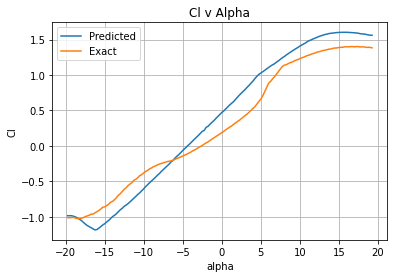

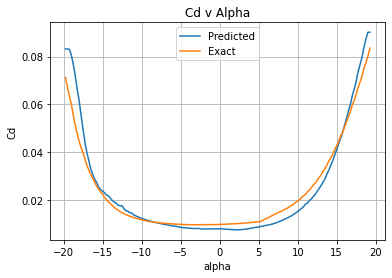

In [ ]:
# Making a prediction 
prediction_polarCurve = rf.predict(feature_valid)
alphaRange=feature_valid['Alpha']
np.squeeze(prediction_polarCurve) # removing of a dimension equal to 1 (from (77,1) to (77,)  )


#print(feature_valid['Naca_1st'].squeeze,feature_valid['Naca_2nd'].squeeze,feature_valid['Naca_3rd'].squeeze)
print(feature_valid['Naca_1st'])
print(feature_valid['Naca_2nd'])
print(feature_valid['Naca_3rd'])
exactPolarCurve = label_valid['Cl']
plt.figure()
plt.plot(alphaRange,prediction_polarCurve[:,0])
plt.plot(alphaRange,exactPolarCurve)
plt.grid();
plt.xlabel('alpha');
plt.ylabel('Cl');
plt.title('Cl v Alpha')
plt.legend(['Predicted', 'Exact'])

exactPolarCurve = label_valid['Cd']
plt.figure()
plt.plot(alphaRange,prediction_polarCurve[:,1])
plt.plot(alphaRange,exactPolarCurve)
plt.grid();
plt.xlabel('alpha');
plt.ylabel('Cd');
plt.title('Cd v Alpha')
plt.legend(['Predicted', 'Exact'])